In [55]:
# Mengecek instalasi tensorflow
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-758.76044, shape=(), dtype=float32)


In [56]:
tf.__version__

'2.12.0'

In [57]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import plot_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [58]:
df_pima_diabetes = pd.read_csv('pima-indians-diabetes.csv')
df_pima_diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [59]:
#Merubah nama kolom dari angka ke nama
df_pima_diabetes = pd.read_csv('pima-indians-diabetes.csv', names=['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age', 'Diabetic'])
df_pima_diabetes.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
#Mengecek nilai missing values
df_pima_diabetes.isnull().mean()

Pregnancies               0.0
PlasmaGlucose             0.0
DiastolicBloodPressure    0.0
TricepsThickness          0.0
SerumInsulin              0.0
BMI                       0.0
DiabetesPedigree          0.0
Age                       0.0
Diabetic                  0.0
dtype: float64

data diatas tidak memiliki nilai missing values

C:\Users\sahab\AppData\Local\Temp\ipykernel_18312\1896363959.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pima_diabetes['Age'])
D:\LUTFI\Anacnda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

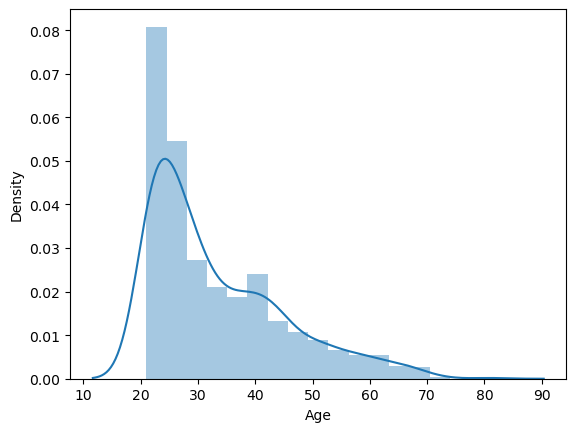

In [61]:
sns.distplot(df_pima_diabetes['Age'])

In [62]:
#Menlihat tipe-tipe data pada data set pima diabetes
df_pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pregnancies             768 non-null    int64  
 1   PlasmaGlucose           768 non-null    int64  
 2   DiastolicBloodPressure  768 non-null    int64  
 3   TricepsThickness        768 non-null    int64  
 4   SerumInsulin            768 non-null    int64  
 5   BMI                     768 non-null    float64
 6   DiabetesPedigree        768 non-null    float64
 7   Age                     768 non-null    int64  
 8   Diabetic                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
#Mendefinisikan features X dan target y
X = df_pima_diabetes.drop('Diabetic', axis=1)
y = df_pima_diabetes['Diabetic']

In [64]:
#Melihat 5 kolom X teratas
X.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [65]:
#Melihat kolom target (y)
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Diabetic, dtype: int64

**Splitting Data sebelum preprocessing**

In [66]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#reset index
for i in [X_train, X_test, y_train, y_test]:
  i.reset_index(drop=True, inplace=True)

#Melihat dimensi
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


Preprocessing **dataset**

In [67]:
#Melakukan feature scaling data dengan MinMaxscaler
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [68]:
#Melihat X_train
X_train = pd.DataFrame(X_train, columns= minmax.get_feature_names_out())
X_train.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0.411765,0.757576,0.639344,0.292929,0.148936,0.524590,0.262169,0.550000
1,0.235294,0.489899,0.491803,0.232323,0.000000,0.420268,0.155850,0.016667
2,0.000000,0.833333,0.737705,0.333333,0.803783,0.779434,0.149018,0.033333
3,0.058824,0.550505,0.459016,0.212121,0.159574,0.375559,0.322374,0.033333
4,0.470588,0.606061,0.000000,0.000000,0.000000,0.447094,0.044833,0.283333


In [69]:
#melihat X_test
X_test = pd.DataFrame(X_test, columns = minmax.get_feature_names_out())
X_test.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0.058824,1.005051,0.622951,0.434343,0.000000,0.639344,0.561913,0.016667
1,0.117647,0.540404,0.606557,0.303030,0.118203,0.500745,0.139197,0.033333
2,0.235294,0.383838,0.508197,0.000000,0.000000,0.506706,0.133646,0.066667
3,0.294118,0.838384,0.590164,0.191919,0.206856,0.384501,0.217336,0.500000
4,0.000000,0.560606,0.532787,0.000000,0.000000,0.366617,0.248506,0.166667


**Mendefinisikan model keras**

In [70]:
#mendefinisikan model keras
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**Menjalankan Model Keras**

In [71]:
#setting model keras dengan loss function dan optimizer
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [72]:
#melihat ringkasan proses model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


**Melakukan training model**



In [73]:
# Mulai melakukan training model
run_model = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1, validation_data = (X_test, y_test))

Epoch 1/100
13/13 [==============================] - 2s 30ms/step - loss: 0.7246 - accuracy: 0.3697 - val_loss: 0.7185 - val_accuracy: 0.3117
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7012 - accuracy: 0.4381 - val_loss: 0.6904 - val_accuracy: 0.5584
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6851 - accuracy: 0.6091 - val_loss: 0.6746 - val_accuracy: 0.6818
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6779 - accuracy: 0.6515 - val_loss: 0.6622 - val_accuracy: 0.6948
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6719 - accuracy: 0.6498 - val_loss: 0.6536 - val_accuracy: 0.7078
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6666 - accuracy: 0.6531 - val_loss: 0.6475 - val_accuracy: 0.7078
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6620 - accuracy: 0.6547 - val_loss: 0.6423 - val_accuracy: 0.7013
Epoch 8/100


**Hasil dari proses fitting di atas memunculkan 2 nilai utama:**

*loss* = ini merupakan nilai yang ingin diminimasi. Semakin kecil nilainya maka semakin dekat kita dengan nilai y yang sesungguhnya.

*accuracy* = nilai akurasi dari hasil klasifikasi yang kita lakukan, artinya seberapa banyak label yang berhasil kita prediksi.

*val_loss* = nilai loss di test set

*val_accuracy* = nilai akurasi di test set

In [74]:
#melihat parameter yang disimpan
print(run_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


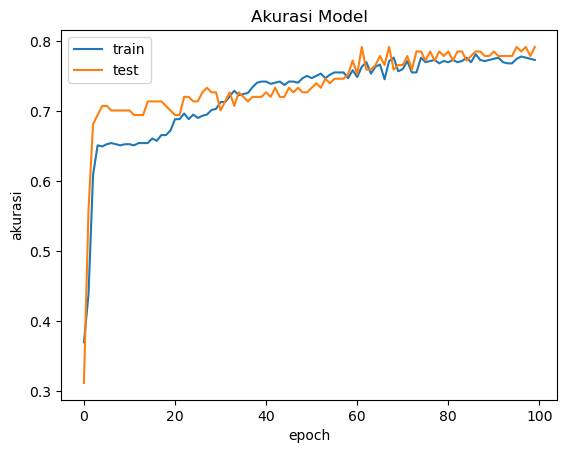

In [75]:
# Proses plotting accuracy selama proses training
plt.plot(run_model.history['accuracy'])
plt.plot(run_model.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('akurasi')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc=0)
plt.show()

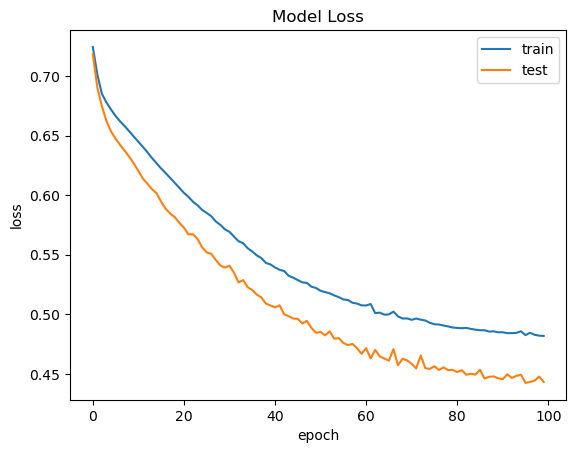

In [76]:
# Proses plotting loss selama proses training
plt.plot(run_model.history['loss'])
plt.plot(run_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc=0)
plt.show()

Memprediksi X_test

In [77]:
# Memprediksi X_test
y_pred = model.predict(X_test)
y_pred

5/5 [==============================] - 0s 2ms/step


array([[0.9440655 ],
       [0.14822401],
       [0.09515002],
       [0.69531643],
       [0.1476649 ],
       [0.05237813],
       [0.7009287 ],
       [0.85127467],
       [0.4299386 ],
       [0.37029243],
       [0.5934355 ],
       [0.9500358 ],
       [0.3749894 ],
       [0.25724378],
       [0.16186826],
       [0.18996961],
       [0.85129523],
       [0.05649902],
       [0.49480003],
       [0.26456872],
       [0.6121783 ],
       [0.30884048],
       [0.37145728],
       [0.08161236],
       [0.05833814],
       [0.3645423 ],
       [0.07022247],
       [0.84281194],
       [0.12289844],
       [0.15246737],
       [0.507897  ],
       [0.2578862 ],
       [0.08608119],
       [0.51857686],
       [0.13044436],
       [0.67817354],
       [0.4305899 ],
       [0.07914441],
       [0.43132976],
       [0.7484037 ],
       [0.2720928 ],
       [0.15680455],
       [0.19240895],
       [0.8138083 ],
       [0.8612573 ],
       [0.05341534],
       [0.10482041],
       [0.239

In [78]:
# Memprediksi X_test dengan pembulatan ke atas
pred_test = (model.predict(X_test) > 0.5).astype(int)
pred_test

5/5 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [79]:
# Menghitung metrics klasifikasi satu per satu
print('Nilai akurasi: {:.2f}'.format(accuracy_score(y_test, pred_test)))
print('Nilai presisi: {:.2f}'.format(precision_score(y_test, pred_test)))
print('Nilai recall: {:.2f}'.format(recall_score(y_test, pred_test)))
print('Nilai f1: {:.2f}'.format(f1_score(y_test, pred_test)))
print('Nilai AUC: {:.2f}'.format(roc_auc_score(y_test, model.predict(X_test))))

Nilai akurasi: 0.79
Nilai presisi: 0.68
Nilai recall: 0.60
Nilai f1: 0.64
5/5 [==============================] - 0s 2ms/step
Nilai AUC: 0.86


In [80]:
# Evaluasi model keras
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}')
print(f'Akurasi: {accuracy:.4f}')

5/5 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.7922
Loss: 0.4432
Akurasi: 0.7922


In [81]:
# Memprediksi 5 baris pertama\
for i in range(5):
    print(f'{X_test.iloc[i,:].tolist()} ==> {pred_test[i]} (seharusnya {y_test[i]})')

[0.058823529411764705, 1.0050505050505052, 0.6229508196721312, 0.43434343434343436, 0.0, 0.639344262295082, 0.5619128949615712, 0.016666666666666663] ==> [1] (seharusnya 1)
[0.11764705882352941, 0.5404040404040404, 0.6065573770491803, 0.30303030303030304, 0.1182033096926714, 0.5007451564828614, 0.13919726729291204, 0.033333333333333326] ==> [0] (seharusnya 0)
[0.23529411764705882, 0.38383838383838387, 0.5081967213114754, 0.0, 0.0, 0.5067064083457526, 0.1336464560204953, 0.06666666666666671] ==> [0] (seharusnya 0)
[0.29411764705882354, 0.8383838383838385, 0.5901639344262295, 0.19191919191919193, 0.20685579196217493, 0.3845007451564829, 0.21733561058923995, 0.5] ==> [1] (seharusnya 1)
[0.0, 0.5606060606060607, 0.5327868852459017, 0.0, 0.0, 0.3666169895678093, 0.2485055508112724, 0.16666666666666663] ==> [0] (seharusnya 0)


In [82]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, pred_test)
cm

array([[94, 13],
       [19, 28]], dtype=int64)

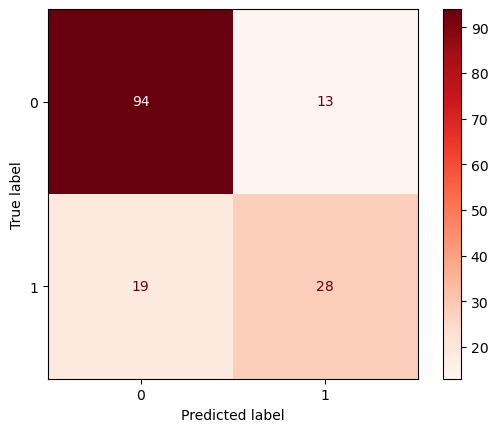

In [83]:
# Melihat confusion matrix dengan ConfusionMatrixDisplay()
vis_cm = ConfusionMatrixDisplay(confusion_matrix = cm,
                                display_labels = np.array([0,1]))
vis_cm.plot(cmap=plt.cm.Reds);

In [84]:
# Menyimpan model
model.save('model_dl.keras')

In [85]:
# Load model
modelku = tf.keras.models.load_model('model_dl.keras')
modelku.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Mencoba memprediksi X_test dengan modelku
modelku.predict(X_test)

5/5 [==============================] - 0s 2ms/step


array([[0.9440655 ],
       [0.14822401],
       [0.09515002],
       [0.69531643],
       [0.1476649 ],
       [0.05237813],
       [0.7009287 ],
       [0.85127467],
       [0.4299386 ],
       [0.37029243],
       [0.5934355 ],
       [0.9500358 ],
       [0.3749894 ],
       [0.25724378],
       [0.16186826],
       [0.18996961],
       [0.85129523],
       [0.05649902],
       [0.49480003],
       [0.26456872],
       [0.6121783 ],
       [0.30884048],
       [0.37145728],
       [0.08161236],
       [0.05833814],
       [0.3645423 ],
       [0.07022247],
       [0.84281194],
       [0.12289844],
       [0.15246737],
       [0.507897  ],
       [0.2578862 ],
       [0.08608119],
       [0.51857686],
       [0.13044436],
       [0.67817354],
       [0.4305899 ],
       [0.07914441],
       [0.43132976],
       [0.7484037 ],
       [0.2720928 ],
       [0.15680455],
       [0.19240895],
       [0.8138083 ],
       [0.8612573 ],
       [0.05341534],
       [0.10482041],
       [0.239

**Menggabungkan sebagai pipeline**

In [87]:
# Membuat model sebagai fungsi
def buat_model():
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    return model

In [88]:
# Menjalankan fungsi buat_model dengan KerasClassifier
model = KerasClassifier(build_fn=buat_model, epochs=100, batch_size=50, verbose=1)

C:\Users\sahab\AppData\Local\Temp\ipykernel_18312\2506134094.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=buat_model, epochs=100, batch_size=50, verbose=1)


In [89]:
# Membuat pipeline
model_dl = Pipeline([
    ('scaling', MinMaxScaler()),
    ('modeling', model)
])

In [90]:
# Mencoba memprediksi X_test dengan modelku
modelku.predict(X_test)

5/5 [==============================] - 0s 2ms/step


array([[0.9440655 ],
       [0.14822401],
       [0.09515002],
       [0.69531643],
       [0.1476649 ],
       [0.05237813],
       [0.7009287 ],
       [0.85127467],
       [0.4299386 ],
       [0.37029243],
       [0.5934355 ],
       [0.9500358 ],
       [0.3749894 ],
       [0.25724378],
       [0.16186826],
       [0.18996961],
       [0.85129523],
       [0.05649902],
       [0.49480003],
       [0.26456872],
       [0.6121783 ],
       [0.30884048],
       [0.37145728],
       [0.08161236],
       [0.05833814],
       [0.3645423 ],
       [0.07022247],
       [0.84281194],
       [0.12289844],
       [0.15246737],
       [0.507897  ],
       [0.2578862 ],
       [0.08608119],
       [0.51857686],
       [0.13044436],
       [0.67817354],
       [0.4305899 ],
       [0.07914441],
       [0.43132976],
       [0.7484037 ],
       [0.2720928 ],
       [0.15680455],
       [0.19240895],
       [0.8138083 ],
       [0.8612573 ],
       [0.05341534],
       [0.10482041],
       [0.239

### Menggabungkan sebagai pipeline

In [91]:
# Membuat model sebagai fungsi
def buat_model():
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) 
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    return model

In [92]:
# Menjalankan fungsi buat_model dengan KerasClassifier
model = KerasClassifier(build_fn=buat_model,
                        epochs=100,
                        batch_size=50,
                        verbose=1)

C:\Users\sahab\AppData\Local\Temp\ipykernel_18312\963982821.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=buat_model,


In [93]:
# Membuat pipeline
model_dl = Pipeline([
    ('scaling', MinMaxScaler()),
    ('modeling', model)
])

In [94]:
# Melihat pipeline
model_dl

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('modeling',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001C36A0F0C90>)])

In [95]:
# Menentukan jumlah fold cv
cv = KFold(n_splits=5)

In [96]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 0)

In [97]:
# Menjalankan 5 fold cross-validation
skor = cross_val_score(model_dl, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=1)

Epoch 1/100
10/10 [==============================] - 2s 2ms/step - loss: 0.6751 - accuracy: 0.6415
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6415
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6415
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6415
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6415
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6415
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.6415
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.6415
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6415
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6388 - accuracy: 0.6415
Epoch 11/

In [98]:
# Melihat nilai setiap fold
for i in skor:
    print("Nilai akurasi setiap split: ", i)

Nilai akurasi setiap split:  0.7317073170731707
Nilai akurasi setiap split:  0.7804878048780488
Nilai akurasi setiap split:  0.7560975609756098
Nilai akurasi setiap split:  0.7723577235772358
Nilai akurasi setiap split:  0.7950819672131147


In [99]:
# Skor rata-rata
print('Akurasi: ', (np.mean(skor)))

Akurasi:  0.767146474743436


In [100]:
# Fitting ke seluruh dataset
model_dl.fit(X,y)

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6711 - accuracy: 0.6523
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6510
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6510
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.6510
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.6523
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6536
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.6615
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.6654
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.6758
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.6706
Epoch 11/

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('modeling',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001C36A0F0C90>)])

In [101]:
# Library untuk menyimpan dan load model
from keras.models import load_model
import joblib

In [102]:
# Menyimpan model keras terlebih dahulu
model_dl.named_steps['modeling'].model.save('model_keras.h5')

In [103]:
# Sedikit kita otak-atik agar bisa disave
model_dl.named_steps['modeling'].model = None

In [104]:
# Sekarang kita simpan pipeline-nya
joblib.dump(model_dl, 'sklearn_pipeline.pkl')

['sklearn_pipeline.pkl']

In [105]:
# Load pipeline nya terlebih dahulu
model_final = joblib.load('sklearn_pipeline.pkl')

In [106]:
# Sekarang load model keras-nya
model_final.named_steps['modeling'].model = load_model('model_keras.h5')

In [108]:
# Mencoba memprediksi dengan model yang sudah diload
prediksi = model_final.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [109]:
prediksi

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    